In [1]:
pip install keras


In [12]:
import yfinance as yf
import pandas as pd
import numpy as np
from keras.models import load_model, Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from datetime import datetime

In [7]:
pip install tensorflow


  Using cached tensorflow-2.17.0-cp312-cp312-win_amd64.whl.metadata (3.2 kB)
  Using cached tensorflow_intel-2.17.0-cp312-cp312-win_amd64.whl.metadata (5.0 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.17.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
Using cached tensorflow-2.17.0-cp312-cp312-win_amd64.whl (2.0 kB)
Using cached tensorflow_intel-2.17.0-cp312-cp312-win_amd64.whl (385.2 MB)
Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
Us

In [14]:
# Download stock data
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)
stock = "GOOG"
google_data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [16]:
# Prepare data for model
Adj_close_price = google_data[['Adj Close']]
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)

x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

x_data, y_data = np.array(x_data), np.array(y_data)

In [18]:
# Create and train the model on the entire dataset
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_data.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_data, y_data, batch_size=1, epochs=2)
model.save("Latest_stock_price_model.keras")

C:\Users\aneesh koparde\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
4923/4923 ━━━━━━━━━━━━━━━━━━━━ 128s 25ms/step - loss: 0.0012
Epoch 2/2
4923/4923 ━━━━━━━━━━━━━━━━━━━━ 148s 26ms/step - loss: 3.8725e-04


In [20]:
# Load the trained model
model = load_model("Latest_stock_price_model.keras")

In [22]:
# Function to predict future prices
def predict_future(model, last_100_days, days_to_predict):
    predicted_prices = []
    current_input = last_100_days

    for _ in range(days_to_predict):
        prediction = model.predict(current_input.reshape(1, -1, 1))
        predicted_prices.append(prediction[0][0])

        current_input = np.append(current_input[1:], prediction[0][0])
        current_input = current_input.reshape(-1, 1)

    return np.array(predicted_prices)

In [24]:
# Predict future prices
days_to_predict = 30
last_100_days = scaled_data[-100:]
predicted_prices = predict_future(model, last_100_days, days_to_predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━

In [26]:
# Inverse transform to get actual prices
predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))

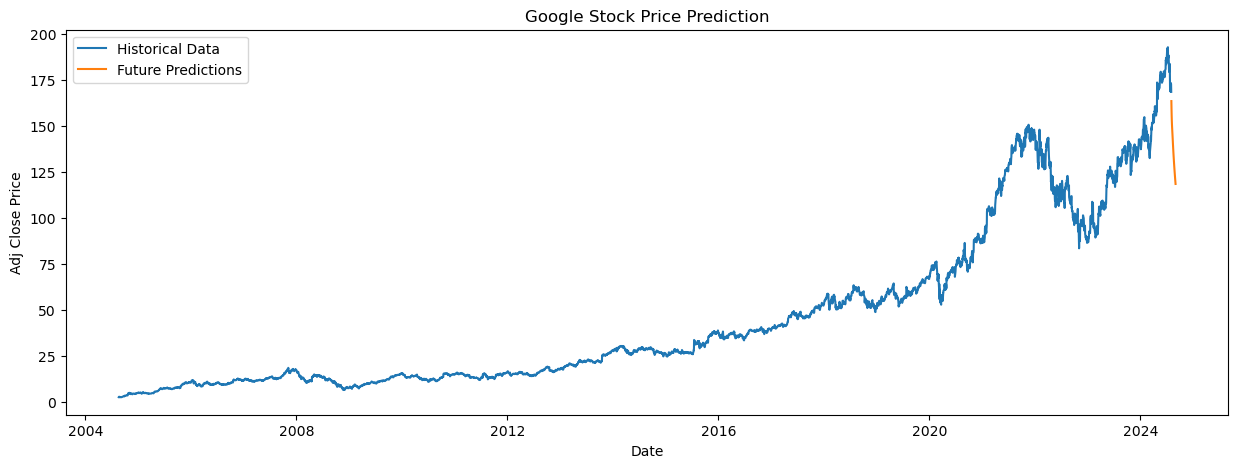

In [30]:
# Plot the predicted prices
future_dates = pd.date_range(start=google_data.index[-1], periods=days_to_predict+1, inclusive='right')
plt.figure(figsize=(15, 5))
plt.plot(google_data.index, google_data['Adj Close'], label='Historical Data')
plt.plot(future_dates, predicted_prices, label='Future Predictions')
plt.xlabel("Date")
plt.ylabel("Adj Close Price")
plt.title("Google Stock Price Prediction")
plt.legend()
plt.show()

In [32]:
# Create a DataFrame for future dates and predicted prices
future_dates = pd.date_range(start=google_data.index[-1], periods=days_to_predict+1, inclusive='right')[1:]
predicted_prices_df = pd.DataFrame(predicted_prices, index=future_dates, columns=["Predicted Price"])

ValueError: Shape of passed values is (30, 1), indices imply (29, 1)

In [34]:
# Predict future prices
days_to_predict = 30
last_100_days = scaled_data[-100:]
predicted_prices = predict_future(model, last_100_days, days_to_predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

In [36]:

# Inverse transform to get actual prices
predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))

In [38]:
# Create a DataFrame for future dates and predicted prices
future_dates = pd.date_range(start=google_data.index[-1], periods=days_to_predict+1, inclusive='right')[1:]
predicted_prices_df = pd.DataFrame(predicted_prices, index=future_dates, columns=["Predicted Price"])

ValueError: Shape of passed values is (30, 1), indices imply (29, 1)

In [40]:
# Create a DataFrame for future dates and predicted prices
future_dates = pd.date_range(start=google_data.index[-1], periods=days_to_predict + 1)[1:]
predicted_prices_df = pd.DataFrame(predicted_prices, index=future_dates, columns=["Predicted Price"])

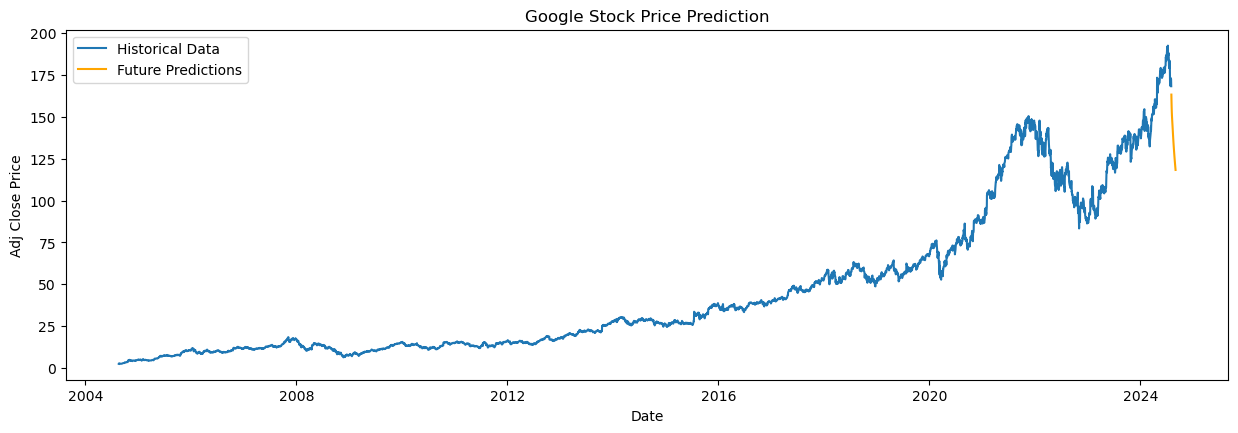

In [42]:
# Plot the historical and predicted prices
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(google_data.index, google_data['Adj Close'], label='Historical Data')
plt.plot(future_dates, predicted_prices, label='Future Predictions', color='orange')
plt.xlabel("Date")
plt.ylabel("Adj Close Price")
plt.title("Google Stock Price Prediction")
plt.legend()

C:\Users\aneesh koparde\AppData\Local\Temp\ipykernel_8460\2698617958.py:15: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


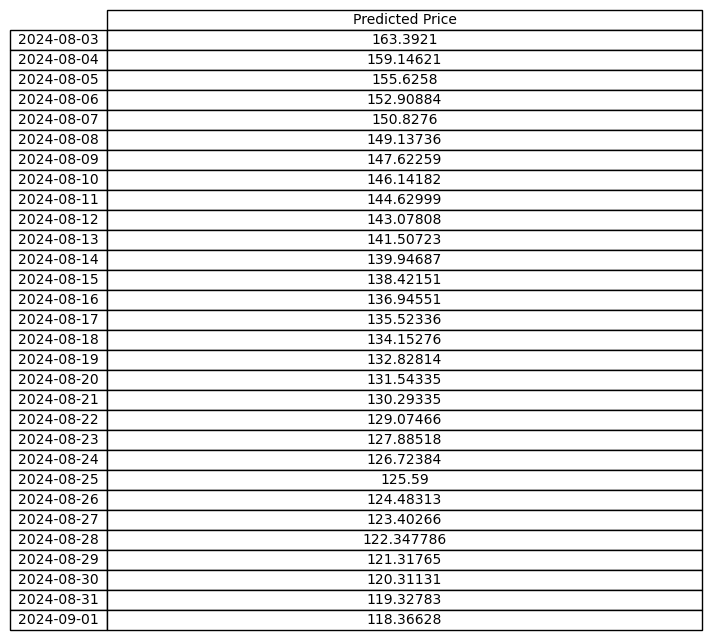

In [44]:
# Add table of predicted prices below the graph
plt.subplot(2, 1, 2)
plt.axis('off')
tbl = plt.table(cellText=predicted_prices_df.values,
                colLabels=predicted_prices_df.columns,
                rowLabels=predicted_prices_df.index.date,
                cellLoc='center',
                rowLoc='center',
                loc='center')

tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.2)

plt.tight_layout()
plt.show()